# **MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

In [ ]:
(xtr,ytr),(xte,yte)=mnist.load_data()

In [ ]:
xtr.shape

(60000, 28, 28)

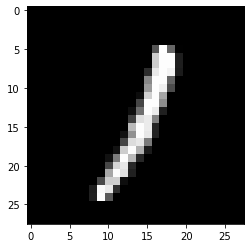

In [ ]:
plt.imshow(xtr[99], cmap='gray')

In [ ]:
ytr[99]

1

In [ ]:
# xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],1).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255

In [ ]:
ytr=tcg(ytr)
yte=tcg(yte)

In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(10, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=256)

Epoch 1/13
235/235 [==============================] - 1s 6ms/step - loss: 0.4414 - accuracy: 0.8766 - val_loss: 28.4380 - val_accuracy: 0.9397
Epoch 2/13
235/235 [==============================] - 1s 5ms/step - loss: 0.1658 - accuracy: 0.9512 - val_loss: 20.5246 - val_accuracy: 0.9547
Epoch 3/13
235/235 [==============================] - 1s 5ms/step - loss: 0.1186 - accuracy: 0.9654 - val_loss: 14.9433 - val_accuracy: 0.9650
Epoch 4/13
235/235 [==============================] - 1s 5ms/step - loss: 0.0920 - accuracy: 0.9721 - val_loss: 15.8264 - val_accuracy: 0.9665
Epoch 5/13
235/235 [==============================] - 1s 5ms/step - loss: 0.0739 - accuracy: 0.9776 - val_loss: 14.2018 - val_accuracy: 0.9734
Epoch 6/13
235/235 [==============================] - 1s 5ms/step - loss: 0.0600 - accuracy: 0.9815 - val_loss: 13.8113 - val_accuracy: 0.9738
Epoch 7/13
235/235 [==============================] - 1s 5ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 16.5787 - val_accuracy: 0.9718

In [ ]:
model.evaluate(xtr,ytr)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0200 - accuracy: 0.9943


[0.01996445469558239, 0.9942666888237]

In [ ]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 0s 1ms/step - loss: 22.0377 - accuracy: 0.9692


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 22.037723541259766
Test accuracy: 0.9692000150680542


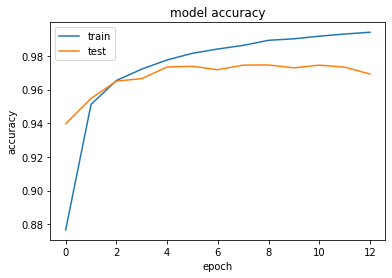

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

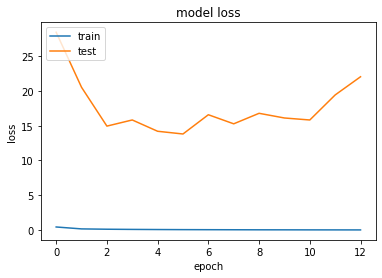

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("mnist_1.hdf5")

In [ ]:
model.load_weights("mnist_1.hdf5")

In [ ]:
loaded_model = tf.keras.models.load_model("mnist_1.hdf5")

loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
xte.shape

(10000, 28, 28)

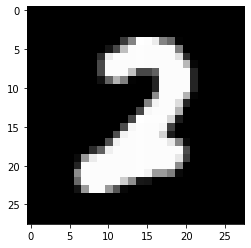

In [ ]:
plt.imshow(xte[199], cmap='gray')

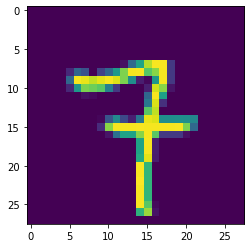

In [ ]:
plt.imshow(xte[832]) 


In [ ]:
print("Predicted sign: "+ str( 
        loaded_model.predict(xte[832].reshape(1, 28, 28, 1))))

print('---------------------------------------------------------------------------')


Predicted sign: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
---------------------------------------------------------------------------


In [ ]:
print("Predicted Sign" + str(loaded_model.predict_classes(xte[832].reshape(1, 28, 28, 1))))

Predicted Sign[7]


In [1]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.10-cp36-none-any.whl size=16378 sha256=e7dc650b32eb01bdac197b8540d8765367377e09f7b2c2bc2e42a1c880ebd21c
  Stored in directory: /root/.cache/pip/wheels/0d/7f/06/e8079dd6f80eb6683fac47c4e1cb720b61cd82d6e4c13d87a5
Successfully built pyngrok


In [2]:
!pip install streamlit

     |████████████████████████████████| 7.2MB 3.1MB/s 
     |████████████████████████████████| 112kB 45.8MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 4.4MB 38.4MB/s 
     |████████████████████████████████| 122kB 43.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=a9b4ef32491915d7b990a5048eb853072a4883f86c91a5cdde521640e9fa7f9f
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=52f15c8bf865f324591ca7b5939da6beb8c2a76784f1e71f7fefb8904aa10a31
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=353737d5cc9f8dee9a819aa904d7cb79e2b37123e6d89ca7e5b92f2238f36b2d
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow.compat.v2 as tf
from PIL import Image , ImageOps
import cv2
import numpy as np


st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():

 model = tf.keras.models.load_model('/content/mnist_54.h5')
 return model

model = lm()

st.write("""
# MNIST Clasifier
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = ImageOps.invert(img)
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

if file is None:
 st.text("Pls upload image")
else:
 image = Image.open(file)
 st.image(image,use_column_width=True)
 p = predict_digit(image)
 st.success(str(p))

In [1]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-09-01 07:49:35--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.209.27.98, 35.172.84.218, 52.1.26.21, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.209.27.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  35.7MB/s    in 0.4s    

2020-09-01 07:49:36 (35.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [2]:
!unzip /content/ngrok-stable-linux-amd64.zip

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [3]:
!./ngrok authtoken 1gXagyREVZG8UEArEmla3g8urHp_7r2v3jmN7PjoHhvwmCT2P

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [4]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [5]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url

'http://c92644180d1d.ngrok.io'